In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


 Loading Data

In [4]:
df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")


In [5]:
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y=df["label"]


In [7]:
X=df.drop("label",axis=1)


In [8]:
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


 Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='label', ylabel='count'>

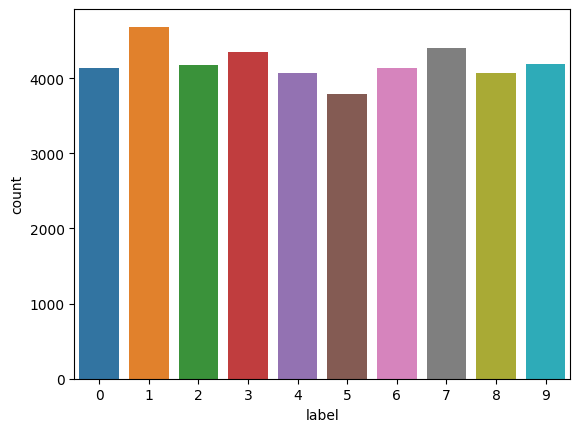

In [9]:
sns.countplot(x=y)


In [10]:
y.value_counts()


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

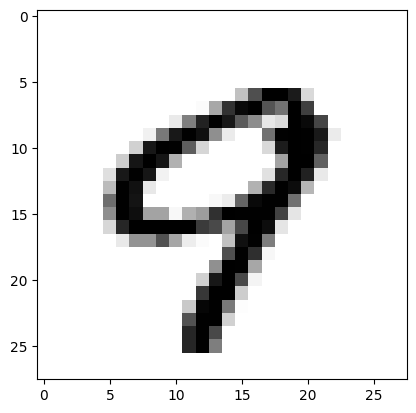

In [11]:
plt.imshow(X.iloc[100].to_numpy().reshape(28,28),cmap='binary')


In [12]:
some_digit=X.to_numpy()[169]
some_digit=some_digit.reshape(28,28)


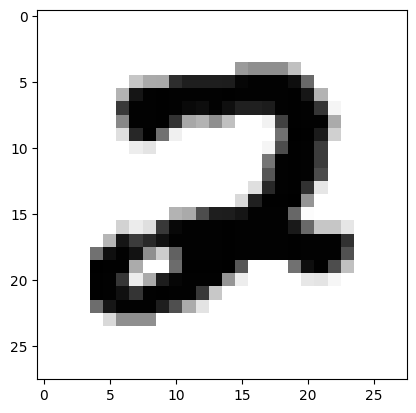

In [13]:
plt.imshow(some_digit,cmap="binary")


In [14]:
y[169]


2

In [15]:
X.isnull().sum()


pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

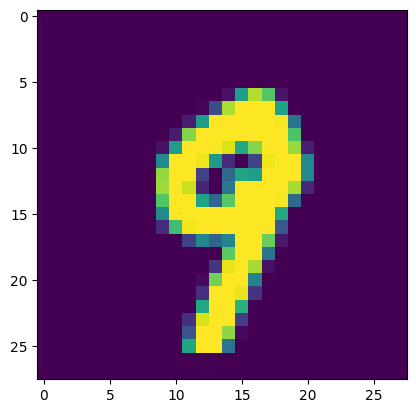

In [16]:
#this shows a better way to plot the images. Using .values will convert the dataseries into a numpy array
plt.imshow(X.iloc[28].values.reshape(28,28))


In [17]:
X.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

 **Reshaping the Data**

In [18]:
# An image is 28x28 size. 28*28=784; 1 represent the channels in the image.
X=X.values.reshape(-1,28,28,1)


In [19]:
X.shape


(42000, 28, 28, 1)

 Normalization

In [20]:
#Pixel range is from 0 to 255,hence the number 255- this will scale images to [0,1]
X=X.astype('float32')/255


In [21]:
import tensorflow as tf
from keras.utils import to_categorical 


 Converting the labels into Categorical labels - Helps with Softmax Classification

In [22]:
y=tf.keras.utils.to_categorical(y,num_classes=10)


In [23]:
y.shape


(42000, 10)

 Data Setup for Model

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
#Additional Validation split is not required as validtion split is mentioned during the model.fit in neural networks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.33, random_state=42)
# # X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.3, random_state=42)#


In [27]:

print(f'The shape of train data {X_train.shape} and test data {X_test.shape}')


The shape of train data (33600, 28, 28, 1) and test data (8400, 28, 28, 1)


 Setting up NN

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
#from tensorflow.keras.layers import


In [29]:
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix


In [30]:
model=Sequential()


In [31]:
#Flattening the data will convert it from (28,28) to (784)
model.add(Flatten(input_shape=(28,28)))
model.add(BatchNormalization())
#model.add(Dense(784,activation="relu"))
model.add(Dense(784,activation="relu"))
model.add(BatchNormalization())
#model.add(Dense(784,activation="relu",kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))


In [32]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [33]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 batch_normalization_1 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               1

In [34]:
history=model.fit(X_train,y_train,epochs=10,batch_size=100,verbose=2,validation_data=(X_test,y_test),validation_split=0.1)


Epoch 1/10
336/336 - 9s - loss: 0.2956 - accuracy: 0.9078 - val_loss: 0.1362 - val_accuracy: 0.9600 - 9s/epoch - 27ms/step
Epoch 2/10
336/336 - 2s - loss: 0.1399 - accuracy: 0.9571 - val_loss: 0.1094 - val_accuracy: 0.9658 - 2s/epoch - 5ms/step
Epoch 3/10
336/336 - 2s - loss: 0.1030 - accuracy: 0.9671 - val_loss: 0.0976 - val_accuracy: 0.9683 - 2s/epoch - 5ms/step
Epoch 4/10
336/336 - 2s - loss: 0.0852 - accuracy: 0.9728 - val_loss: 0.1003 - val_accuracy: 0.9700 - 2s/epoch - 5ms/step
Epoch 5/10
336/336 - 2s - loss: 0.0730 - accuracy: 0.9764 - val_loss: 0.0890 - val_accuracy: 0.9727 - 2s/epoch - 5ms/step
Epoch 6/10
336/336 - 2s - loss: 0.0626 - accuracy: 0.9796 - val_loss: 0.0825 - val_accuracy: 0.9746 - 2s/epoch - 5ms/step
Epoch 7/10
336/336 - 2s - loss: 0.0565 - accuracy: 0.9815 - val_loss: 0.0824 - val_accuracy: 0.9744 - 2s/epoch - 5ms/step
Epoch 8/10
336/336 - 2s - loss: 0.0502 - accuracy: 0.9835 - val_loss: 0.0819 - val_accuracy: 0.9751 - 2s/epoch - 5ms/step
Epoch 9/10
336/336 - 2s

 Model Evaluation

In [35]:
model.history.history


{'loss': [0.2955891489982605,
  0.13992708921432495,
  0.10302568972110748,
  0.08521565049886703,
  0.07299374043941498,
  0.06257031857967377,
  0.056451886892318726,
  0.050164543092250824,
  0.04331950098276138,
  0.04009057581424713],
 'accuracy': [0.9078273773193359,
  0.9570833444595337,
  0.9671130776405334,
  0.9727976322174072,
  0.9763690233230591,
  0.9795833230018616,
  0.9815178513526917,
  0.9834523797035217,
  0.9859821200370789,
  0.9866368770599365],
 'val_loss': [0.1361800879240036,
  0.10940840095281601,
  0.09761019796133041,
  0.10026875138282776,
  0.08899211138486862,
  0.0824955552816391,
  0.08240250498056412,
  0.08190983533859253,
  0.0840303972363472,
  0.08329546451568604],
 'val_accuracy': [0.9599999785423279,
  0.965833306312561,
  0.9683333039283752,
  0.9700000286102295,
  0.9727380871772766,
  0.9746428728103638,
  0.9744047522544861,
  0.9751190543174744,
  0.9754762053489685,
  0.9772619009017944]}

In [36]:
predictions=model.predict(X_test)


263/263 [==============================] - 1s 2ms/step


In [37]:
predictions.shape


(8400, 10)

In [38]:
y_test.shape


(8400, 10)

In [39]:
# model.summary()


In [40]:
model.evaluate(X_test,y_test)


263/263 [==============================] - 1s 3ms/step - loss: 0.0833 - accuracy: 0.9773


[0.08329547941684723, 0.9772619009017944]

In [41]:
#the output of model.evaluate gives out a tuple: loss, metric specified in model.compile
scores = model.evaluate(X_test,y_test, verbose=0)


In [42]:
scores


[0.08329547941684723, 0.9772619009017944]

<Axes: >

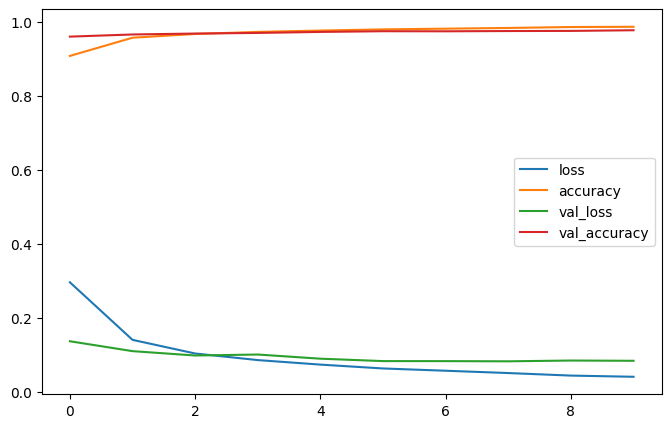

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))


 Building a CNN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Conv2D,MaxPooling2D,Dropout,Input
from tensorflow.keras.layers import Flatten



In [45]:
model2=Sequential()


In [46]:
#model2.add(Flatten(input_shape=(28,28)))
model2.add(Input(shape=(28,28,1)))
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))


In [47]:
# #Using LeNet-5
# model2 = Sequential()
# model2.add(Input(shape=(28,28,1)))
# model2.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
# model2.add(layers.AveragePooling2D())

# model2.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
# model2.add(layers.AveragePooling2D())

# model2.add(layers.Flatten())

# model2.add(layers.Dense(units=120, activation='relu'))

# model2.add(layers.Dense(units=84, activation='relu'))

# model2.add(layers.Dense(units=10, activation = 'softmax'))


In [48]:
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [49]:
print(model2.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                      

In [50]:
history2=model2.fit(X_train,y_train,epochs=10,batch_size=100,verbose=2,validation_split=0.1)


Epoch 1/10
303/303 - 10s - loss: 0.3423 - accuracy: 0.8968 - val_loss: 1.5569 - val_accuracy: 0.4646 - 10s/epoch - 31ms/step
Epoch 2/10
303/303 - 1s - loss: 0.1155 - accuracy: 0.9661 - val_loss: 0.0529 - val_accuracy: 0.9851 - 1s/epoch - 5ms/step
Epoch 3/10
303/303 - 1s - loss: 0.0862 - accuracy: 0.9745 - val_loss: 0.0730 - val_accuracy: 0.9818 - 1s/epoch - 5ms/step
Epoch 4/10
303/303 - 1s - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.0476 - val_accuracy: 0.9866 - 1s/epoch - 5ms/step
Epoch 5/10
303/303 - 1s - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0524 - val_accuracy: 0.9860 - 1s/epoch - 5ms/step
Epoch 6/10
303/303 - 1s - loss: 0.0514 - accuracy: 0.9851 - val_loss: 0.0395 - val_accuracy: 0.9896 - 1s/epoch - 5ms/step
Epoch 7/10
303/303 - 1s - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0464 - val_accuracy: 0.9884 - 1s/epoch - 5ms/step
Epoch 8/10
303/303 - 1s - loss: 0.0398 - accuracy: 0.9870 - val_loss: 0.0520 - val_accuracy: 0.9878 - 1s/epoch - 5ms/step
Epoch 9/10
303/303 - 

<Axes: >

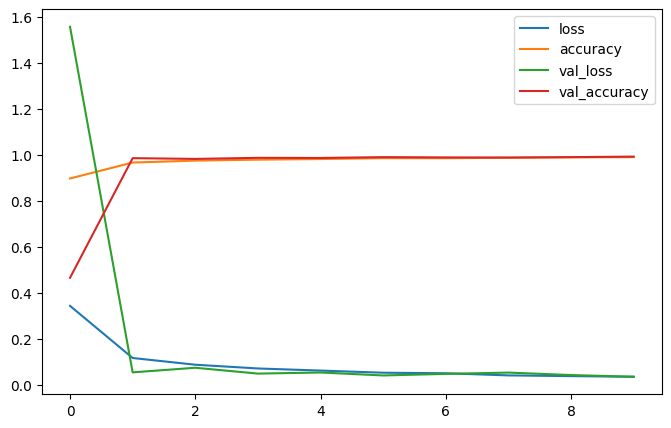

In [51]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))


In [52]:
cnn_predict=model2.predict(X_test)


263/263 [==============================] - 1s 2ms/step


In [53]:
model2.evaluate(X_test,y_test)


263/263 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9907


[0.03958265110850334, 0.9907143115997314]

**Test Prediction**

In [54]:
test_data=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")


In [55]:
test_X=test_data/255


In [56]:
test_X=test_X.values.reshape(-1,28,28,1)


In [57]:
new_predict=model2.predict(test_X)


875/875 [==============================] - 2s 2ms/step


In [58]:
new_predict1=np.argmax(new_predict,axis=1)

In [59]:
results = pd.Series(new_predict1,name="Label")

submission=pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [60]:
submission.to_csv("submission.csv",index=False)